# learn about simulation

In [2]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


In [ ]:
import matplotlib.pyplot as plt

### test world

In [3]:
import carla

client = carla.Client('localhost', 2000)
client.set_timeout(120)
world = client.get_world()  


In [ ]:
settings = world.get_settings()
settings.fixed_delta_seconds = 0.2
settings.synchronous_mode = True
settings.max_substeps = 16
settings.max_substep_delta_time = 0.0125
world.apply_settings(settings)
client.reload_world(False)

In [4]:
from utils.tools import carla_point
from config.env.spawn_points import ait_football

In [7]:
sp=carla.Transform(carla.Location(*ait_football[0]['Location']),carla.Rotation(*ait_football[0]['Rotation']))

In [8]:
blueprints = world.get_blueprint_library()
bp_car = blueprints.filter('evt_echo_4s')[0]   
car = world.spawn_actor(bp_car, sp)

In [13]:
print(car.get_location())
print(car.get_velocity())


Location(x=-361.000000, y=-142.899994, z=-0.000418)
Vector3D(x=0.000000, y=0.000000, z=0.000000)


In [31]:
car.get_transform().rotation.yaw

-179.99996948242188

In [14]:
car.get_velocity().length()

0.0

In [18]:
car.get_control().steer

0.5

In [17]:
car.apply_control(carla.VehicleControl(throttle=0, steer=0.5, brake=False,
                                       hand_brake=False, reverse=False, manual_gear_shift=False, gear=0))

### test wrapped environment

In [ ]:
import gc
gc.set_debug(gc.DEBUG_LEAK)
gc.collect()
print(gc.garbage)

In [1]:
import matplotlib.pyplot as plt

In [3]:
from config.env.camera import front_cam,spectator_cam
from environment.tools.actor_wrapper import *
world = World('localhost',2000,0.2)

In [4]:
world.actor_list

[]

In [4]:
from config.env.spawn_points import ait_football_spawn
car = VehicleActor(world,'evt_echo_4s',ait_football_spawn)

initialize car actor


In [5]:
cam1 = RGBCamera(world,car,front_cam)

initialize obs actor


In [6]:
world.actor_list

In [15]:
world.reset_actors()

In [25]:
world.tick()

36144

In [13]:

image=cam1.get_obs()

In [26]:
images = world.get_all_obs()

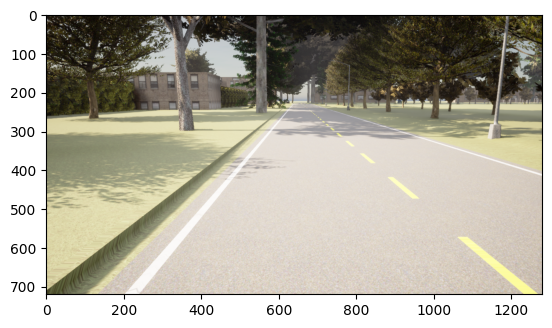

In [27]:
plt.imshow(images[0])

In [28]:
world.reset()

Destroying all spawned actors
Destroying  <environment.tools.actor_wrapper.VehicleActor object at 0x72f7eb668100> ...
Destroying  <environment.tools.actor_wrapper.RGBCamera object at 0x72f7e732fcd0> ...


In [13]:
cam1.destroy()

Destroying  <environment.tools.env_wrapper.RGBCamera object at 0x73e54c123b50> ...


In [16]:
car.destroy()

True

In [17]:
actors1 = world.get_actors()
for actor in actors1:
    print(actor)

len(actors1)

Actor(id=129, type=traffic.speed_limit.30)
Actor(id=128, type=traffic.speed_limit.30)
Actor(id=127, type=traffic.speed_limit.30)
Actor(id=126, type=traffic.speed_limit.30)
Actor(id=125, type=traffic.speed_limit.30)
Actor(id=124, type=traffic.speed_limit.30)
Actor(id=123, type=traffic.speed_limit.30)
Actor(id=122, type=traffic.speed_limit.30)
Actor(id=121, type=traffic.speed_limit.30)
Actor(id=120, type=traffic.speed_limit.30)
Actor(id=119, type=traffic.speed_limit.30)
Actor(id=118, type=traffic.speed_limit.30)
Actor(id=117, type=traffic.speed_limit.30)
Actor(id=116, type=traffic.speed_limit.30)
Actor(id=115, type=traffic.speed_limit.30)
Actor(id=114, type=traffic.speed_limit.30)
Actor(id=113, type=traffic.speed_limit.30)
Actor(id=112, type=traffic.speed_limit.30)
Actor(id=111, type=traffic.speed_limit.30)
Actor(id=110, type=traffic.speed_limit.30)
Actor(id=109, type=traffic.speed_limit.30)
Actor(id=108, type=traffic.speed_limit.30)
Actor(id=107, type=traffic.speed_limit.30)
Actor(id=10

43

# test full-env

In [1]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


initialize neccesory module

In [2]:
# import gc
# gc.set_debug(gc.DEBUG_LEAK)
# gc.collect()
# print(gc.garbage)

In [3]:
# some module that may use later
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# semantic segmentation
from segmentation.seg_hf import HF_mask2Formermodel
from config.seg_config import mask2former_labelmap
modelrepo = "facebook/mask2former-swin-large-mapillary-vistas-semantic"
seg_model = HF_mask2Formermodel(model_repo=modelrepo,fp16=True,label_mapping=mask2former_labelmap,crop=(512,1024))

/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


===== Segmentation =====
using  cuda
inference time :0.078266


In [5]:
# variational autoencoder
from autoencoder.vae_wrapper import VencoderWrapper,DecoderWrapper
vae_encoder = VencoderWrapper(model_path="../autoencoder/model/vae32/best/var_encoder_model.pth",latent_dims=32)
vae_decoder = DecoderWrapper(model_path="../autoencoder/model/vae32/best/decoder_model.pth",latent_dims=32)

===== Encoder =====
using cuda
inference time :0.003124
===== Decoder =====
using cuda
inference time :0.001775


In [6]:
# observer module (convert raw input to proper state)
# donb't need vae_decoder if not reconstruct the latent
from environment.tools.observer import SegVaeActHistObserver
observer1 = SegVaeActHistObserver(vae_encoder = vae_encoder,
                                  seg_model=seg_model,
                                  vae_decoder=vae_decoder,
                                  latent_space=32,
                                  num_img_input = 1,
                                  act_num=2,
                                  hist_len = 8,
                                  skip_frame=0)

In [7]:
# rewarder (object to calculate the reward for env)
from environment.tools.rewarder import RewardFromMap
rewarder1 = RewardFromMap(mask_path="../environment/rewardmask/ait_map/ait_football.png")

In [8]:
# action wrapper (object to post process the action like smooth, limit range or discretize)
from environment.tools.action_wraper import LimitAction,OriginAction
from config.env.action_config import limit_action
action_wrapper = LimitAction(limit_action,stable_steer=True)

In [9]:

# carla environment
from environment.CarlaEnv import CarlaImageEnv

from config.env.camera import front_cam,left_cam
from config.env.spawn_points import ait_football_spawn
from config.env.env_config import ait_football_env

env = CarlaImageEnv(observer=observer1,
                rewarder=rewarder1,   
                car_spawn=ait_football_spawn,
                spawn_mode='static',
                action_wrapper = action_wrapper, 
                env_config =ait_football_env,
                cam_config_list=[front_cam], 
                discrete_actions = None,
                activate_render = False,
                seed=2024,
                render_raw=True,
                render_seg=True,
                render_reconst=True,
                rand_weather=False)



pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html
using continuous space steer = [-1,1] , throttle = [0,1]
initialize car actor
initialize obs actor
initialize colli actor


In [10]:
from stable_baselines3 import SAC,PPO
from sb3_contrib import RecurrentPPO

In [11]:

from stable_baselines3.common.evaluation import evaluate_policy

In [12]:
model = SAC('MlpPolicy', env, verbose=1, seed=2024, tensorboard_log="../runs/RL", device='cuda')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [13]:
model.learn(total_timesteps=10000)

Logging to ../runs/RL/SAC_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82       |
|    ep_rew_mean     | 1.98     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 10       |
|    time_elapsed    | 31       |
|    total_timesteps | 328      |
| train/             |          |
|    actor_loss      | -3.11    |
|    critic_loss     | 0.419    |
|    ent_coef        | 0.935    |
|    ent_coef_loss   | -0.228   |
|    learning_rate   | 0.0003   |
|    n_updates       | 227      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 116      |
|    ep_rew_mean     | -1       |
| time/              |          |
|    episodes        | 8        |
|    fps             | 10       |
|    time_elapsed    | 88       |
|    total_timesteps | 932      |
| train/             |          |
|    actor_loss      | -4.94    |
|    critic_loss    

In [14]:
# fix terminated by -reward to more specific
# valkan memory

In [15]:
# model = RecurrentPPO("MlpLstmPolicy", "CartPole-v1", verbose=1)

check env play loop

In [ ]:
arr

In [16]:
try:
    for _ in range(1):
        observation = env.reset()
        done = False

        act,_ = model.predict(observation.reshape(1,272))
        while True:
            observation, reward, done, _ = env.step(act)
            if done :
                break

except Exception as e:
    print(e)

finally:

    env.close()

'SAC' object is not callable
Destroying all spawned actors
Destroying  <environment.tools.actor_wrapper.VehicleActor object at 0x76d886926be0> ...
Destroying  <environment.tools.actor_wrapper.RGBCamera object at 0x76d886926c10> ...
Destroying  <environment.tools.actor_wrapper.CollisionSensor object at 0x76d886926820> ...


In [24]:
action = model.predict(observation.reshape((1,272)))

In [25]:
action

(array([0.79448426, 0.94838136], dtype=float32), None)

In [17]:
env.close()

Destroying all spawned actors


In [18]:
observation.shape

(272,)